# Avocado project prediction

In [81]:
#importing required modules to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import time

In [82]:
#collecting data
df= pd.read_csv(r'C:\Users\Lenovo\Downloads\avocado.csv.zip')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [83]:
df.shape

(18249, 14)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [85]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Checking for missing values

In [86]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

super! , with having 0 null values we will proceed with the Univariate, multivariate and Outlier analysis of our data

# UNIVARIATE and BIVARIATE ANALYSIS

In [87]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [88]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [89]:
#changing the format of the Date column into date-time and then creating indivisual column for
# year, month and day
#also removing the Date(as we are creating additional column for date and month ) and Unnamed: 0 column,
#as it is not useful for our model, it is only an index column for our data,Removing the day columns as well.

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = df['Date'].dt.dayofweek
df = df.drop(['Unnamed: 0','Date','Day'],axis=1)

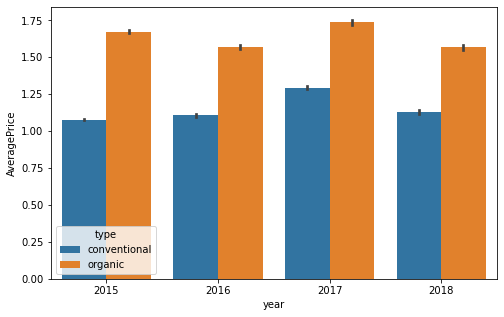

In [90]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='AveragePrice',hue='type',data=df)
plt.show()

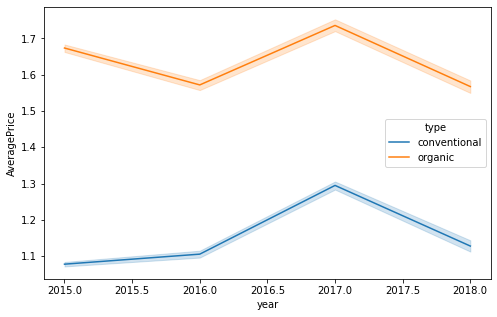

In [91]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)
plt.show()

in the above barplot and line plor it can be seen that the avg price of the organic avocado is higher than of the conventional, which is obvious, Conventional is the opposite of Organic

Generally conventional methods of growing include the use of chemical pesticides, fertilizers and weed killers that are harmful to your health. That is why the price of Organic, unharmful type is higher.

Price in 2017 was at peak for both organic and conventional type of avocado. Below I will be plotting the price region wise

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


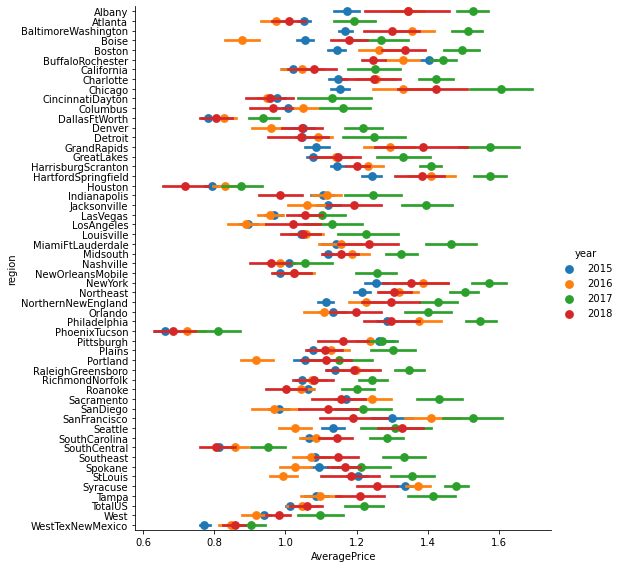

In [92]:
#lets see the Average price of the conventional and organic avocado in all the region over the years
        
sns.factorplot(x='AveragePrice',y='region',hue='year',data= df[df['type']=='conventional'],size=8,join=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


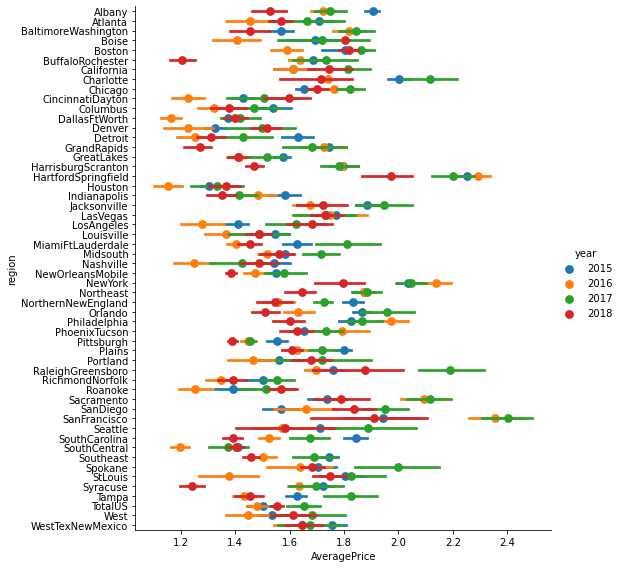

In [93]:
sns.factorplot(x='AveragePrice',y='region',hue='year',data= df[df['type']=='organic'],size=8,join=False)

from the above graphs, CONVENTIONAL = we can see that the price in chicago is very hight, highest from all other region whereas Phoenix Tucson and Houston have low price

ORGANIC = we can see that the price in SanFrancisco is very hight, highest from all other region whereas Houston have have low price also it can be seen that in 2017 the price were the highest, in 2018 avg price is less than of 2017's. The reason behing the high price increase was due to surging global demand and reduced harvests from major producers Mexico, Peru and California.

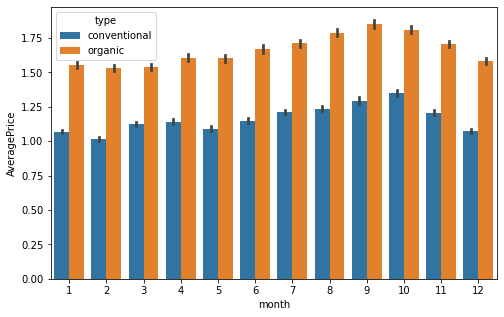

In [94]:
#checking the AveragePrice of the avocado of both types organic and conventional on monthly basis, 
#to check during what time of the year the price increases, it will show the peak season for Avocados.

plt.figure(figsize=(8,5))
sns.barplot(x='month',y='AveragePrice',hue='type',data=df)
plt.show()

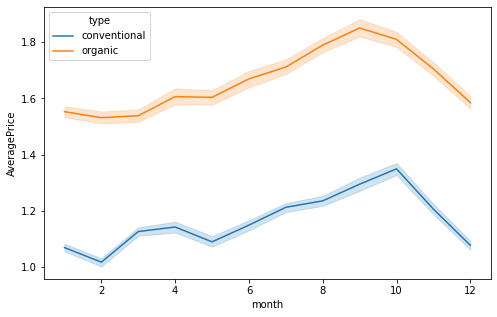

In [95]:
#checking the AveragePrice of the avocado of both types organic and conventional on monthly basis, 
#to check during what time of the year the price increases

plt.figure(figsize=(8,5))
sns.lineplot(x='month',y='AveragePrice',hue='type',data=df)
plt.show()

here we can see that the price gets increased from may to september. from May to August/September it is a peak season for the demand of Avocado in US. The reason for high price could be due to less supply of Avocados, hence price is increased source = http://blog.imperfectfoods.com/blog-1/2019/2/13/when-are-avocados-in-season

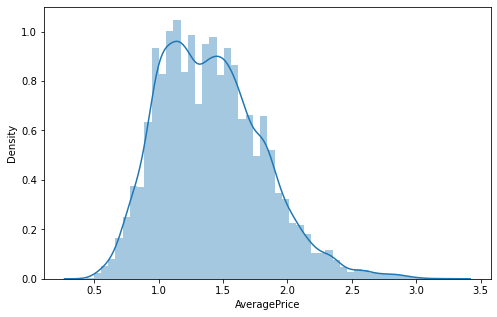

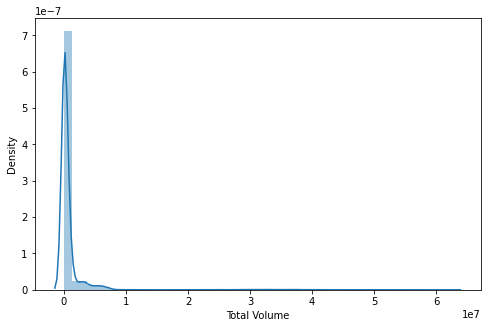

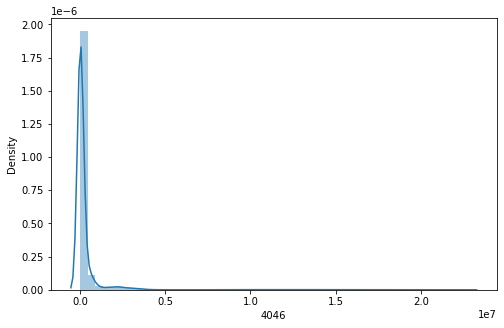

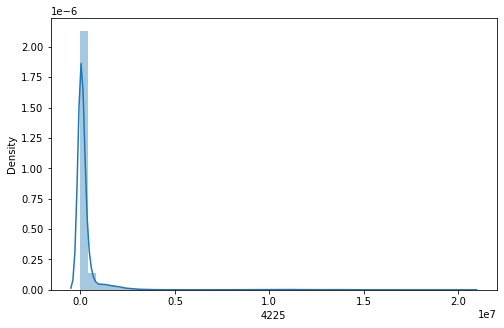

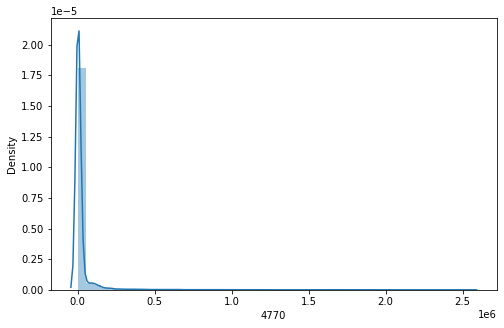

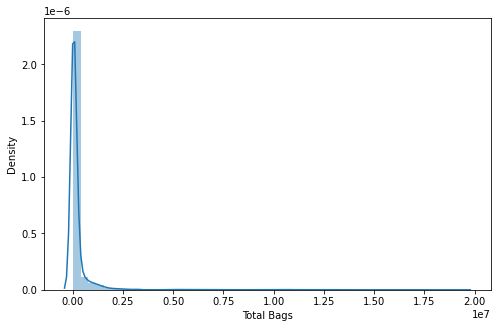

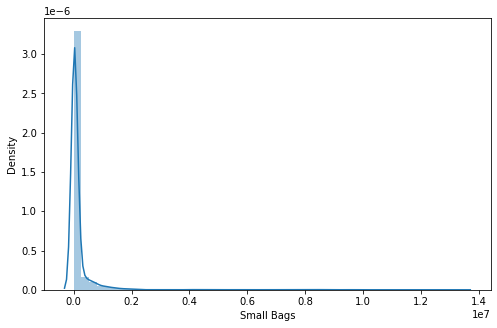

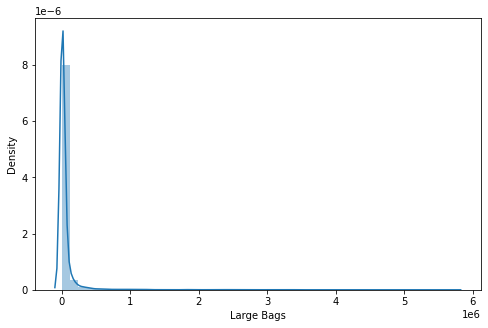

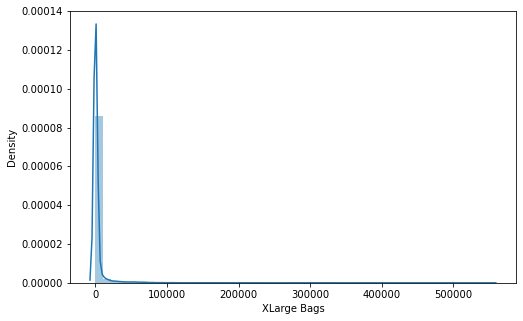

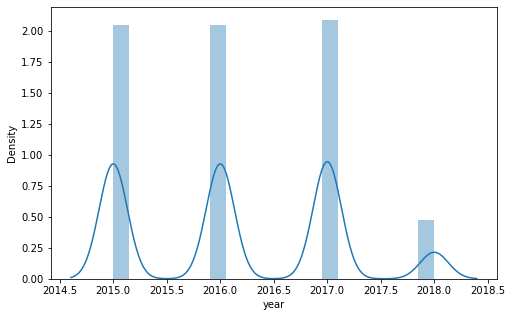

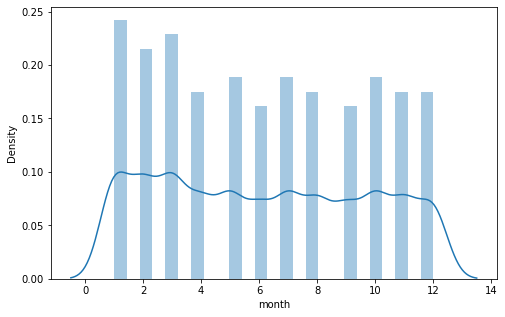

In [96]:
#Univariate analysis of Features except type column and region column
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure(figsize=(8,5))
        sns.distplot(df[i])
        plt.show()

From the above graphs, we can see that the AveragePrice is almost normally distributed, however other inputs are Right skewed as we can see a long tail towards right.. We will later reduce the skweness for our model bultion using power transformation. and Average Price from 1 to 1.4(approx) have the highest weigth.

# MULTIVARIATE ANALYSIS

In [128]:
#creating a num_var which will include all numerical continous data for pairplot

num_var = df.select_dtypes(['int64','float64'])
num_var.drop(['year','month'],axis=1,inplace=True)
num_var.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0


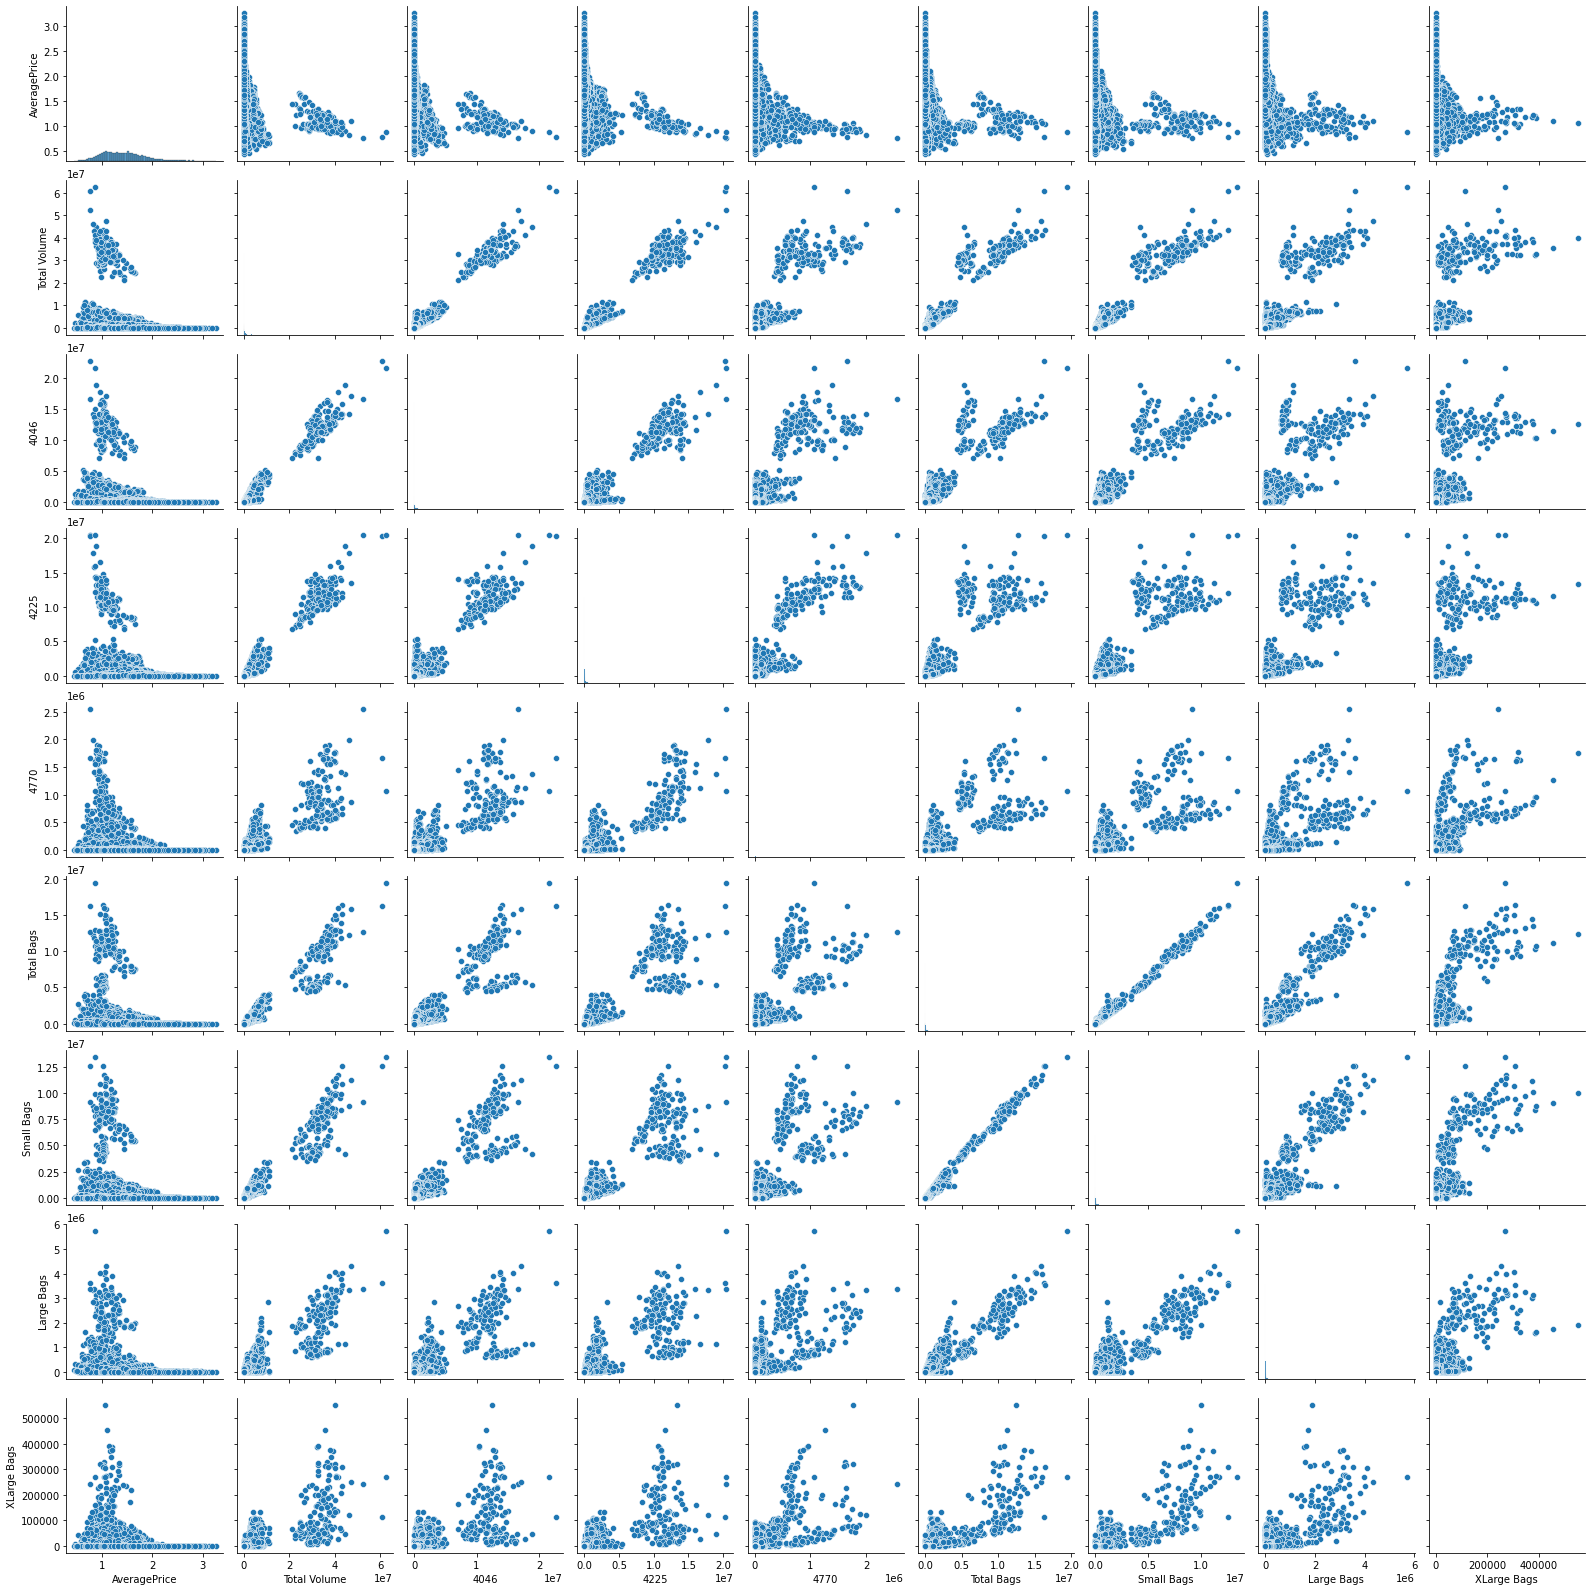

In [98]:
sns.pairplot(num_var)

# LABEL ENCODING

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [100]:
#converting type and region column using label encoder
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


# Outlier Detection

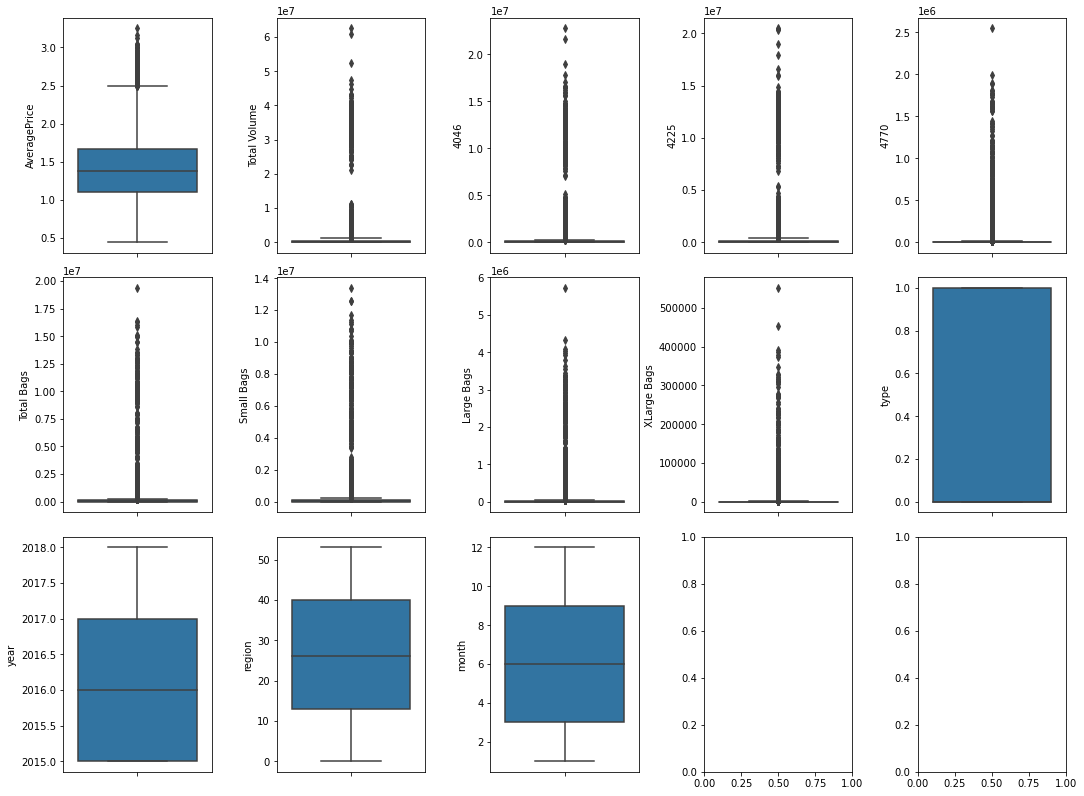

In [101]:
 fig, ax = plt.subplots(ncols=5 ,nrows=3 , figsize=(15,11))
index = 0
ax = ax.flatten()

for i,value in df.items():
    sns.boxplot(y=i, data=df ,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

we can see that the input variables surely have outliers, as we have also seen in the distplot features like (Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags) are left skewed so, it is proved that these features have some outliers, we will fix them

In [102]:
from scipy.stats import zscore

In [103]:
z = np.abs(zscore(df))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      typ

In [104]:
#now setting the threshold limit to 3, the reason being 99% of the data is in 3 standard deviation.

threshold = 3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [105]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(17651, 13)

In [106]:
print("Shape of our old data :", df.shape)
print("Shape of our cleaned data :", df_new.shape)

Shape of our old data : (18249, 13)
Shape of our cleaned data : (17651, 13)


# CORRELATION HEATMAP

In [107]:
#plotting heatmap that will show the correlation of inputs and output variables.
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


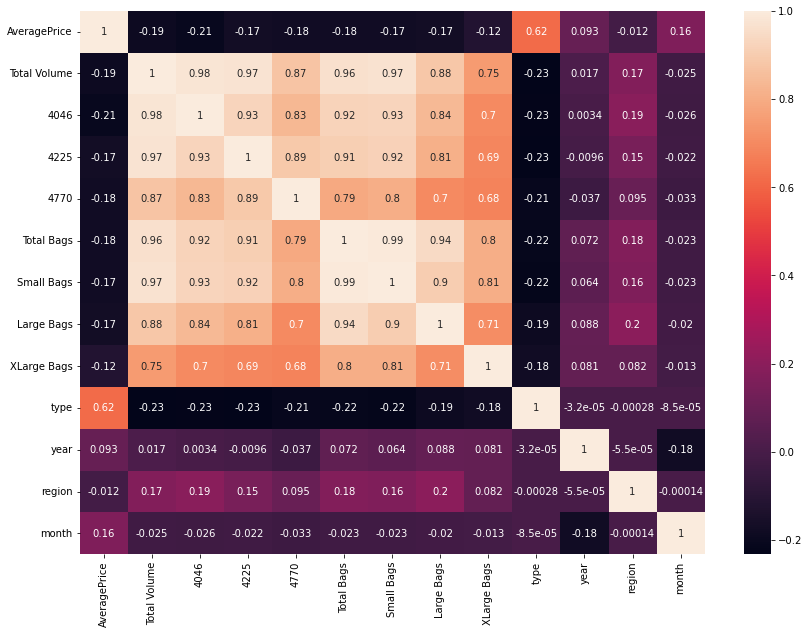

In [108]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [109]:
df_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242,0.149502
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676,-0.018645
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067,-0.015797
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002,-0.019844
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972,-0.027245
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892,-0.010916
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976,-0.013018
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635,-0.001457
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338,0.002843
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409,-0.009499


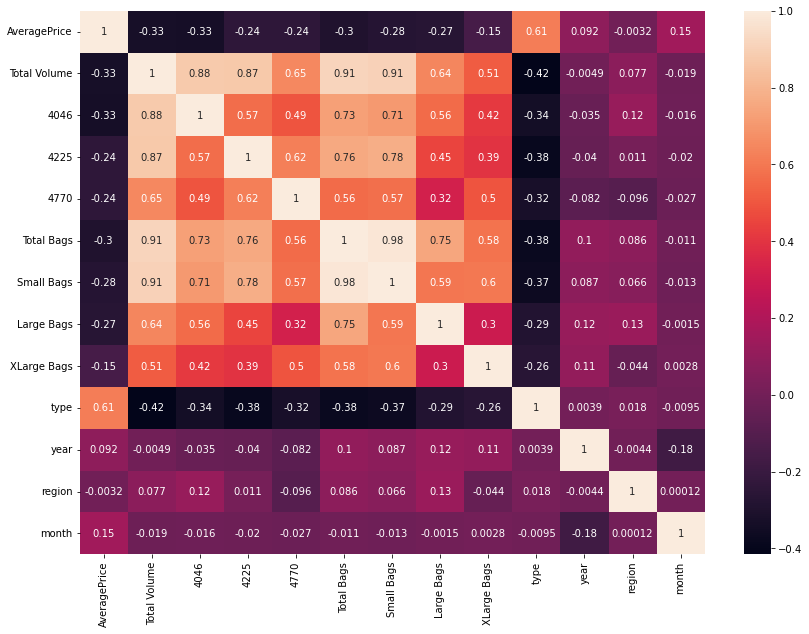

In [110]:
plt.figure(figsize=(14,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

From here we can observe that most of the values are positive which shows that features are much correlated, however features does have negative correlation. I will be using all my input features as I think these will provide better score for my model. As we can see that the avocado type plays an important role in the price prediction, and type columnis again highly correlated to other features (Total Volume, 4046 PLU, 4255 PLU, 4770 PLU, Total Bags, Small Bags, Large Bags, XLarge Bags.

# CHECKING and FIXING DATA SKEWNESS

In [113]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
month           0.106617
dtype: float64

In [114]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [115]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.840536
type            0.000329
year            0.215339
region          0.000030
month           0.106617
dtype: float64

# Splitting input and output data

In [116]:
x = df.drop('AveragePrice',axis=1)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11


In [117]:
y = df['AveragePrice']
y.head()

0    0.845868
1    0.854415
2    0.657520
3    0.732368
4    0.824175
Name: AveragePrice, dtype: float64

we have seperated input data as x, and Output data as y, later we will be using them for our model prediction

# Scaling the inputs

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc = StandardScaler()

In [120]:
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc)
x_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.107282,-0.609752,0.374936,-0.279143,-0.494074,-0.247796,-0.669747,-0.694352,-0.999836,-1.221282,-1.700252,1.647632
1,-0.175949,-0.737707,0.305200,-0.233838,-0.454761,-0.213093,-0.658279,-0.694352,-0.999836,-1.221282,-1.700252,1.647632
2,0.158690,-0.688840,0.618892,-0.042078,-0.523041,-0.273995,-0.643743,-0.694352,-0.999836,-1.221282,-1.700252,1.647632
3,-0.017121,-0.583598,0.472808,-0.181974,-0.672335,-0.409182,-0.576571,-0.694352,-0.999836,-1.221282,-1.700252,1.647632
4,-0.207558,-0.638425,0.298852,-0.171717,-0.644845,-0.388616,-0.475393,-0.694352,-0.999836,-1.221282,-1.700252,1.364669


# Cross Validation test for best model

In [121]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [122]:
# seprate data into train and test and create model

X = df_new.drop("AveragePrice",axis =1)
y =df_new["AveragePrice"]

# Applying standard scaler to scale the data point.

sc = StandardScaler()
X = sc.fit_transform(X)


# we will find best random state wit this for loop.
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training_score",LR.score(X_train,y_train),"Random_state",i)
    pred = LR.predict(X_test)
    print("test_score",LR.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")
    

Training_score 0.44384933624654155 Random_state 50
test_score 0.4345458791974266
Mean_squared_error 0.0823069884981954
R2_scoe 0.4345458791974266 

Training_score 0.44491565110827136 Random_state 125
test_score 0.42969623875722374
Mean_squared_error 0.0847903565083898
R2_scoe 0.42969623875722374 

Training_score 0.44434142926777076 Random_state 200
test_score 0.4337991662826356
Mean_squared_error 0.08420831559941501
R2_scoe 0.4337991662826356 

Training_score 0.441266322443422 Random_state 275
test_score 0.4451506075680458
Mean_squared_error 0.08495424888055197
R2_scoe 0.4451506075680458 

Training_score 0.44390875172640376 Random_state 350
test_score 0.4358467403537172
Mean_squared_error 0.08451354201250638
R2_scoe 0.4358467403537172 

Training_score 0.4435539482279006 Random_state 425
test_score 0.4353979203744154
Mean_squared_error 0.08435102721030227
R2_scoe 0.4353979203744154 



In [123]:
# testing
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9843084466649729 Random_state 50
test_score 0.8923007529274704
Mean_squared_error 0.01567660463324837
R2_scoe 0.8923007529274704 

Training_score 0.9843067505430975 Random_state 100
test_score 0.8914206845437631
Mean_squared_error 0.015806033010478615
R2_scoe 0.8914206845437631 

Training_score 0.9846684279702531 Random_state 150
test_score 0.8804582844641384
Mean_squared_error 0.017794273545737743
R2_scoe 0.8804582844641384 

Training_score 0.9841384302496782 Random_state 200
test_score 0.8861852002923581
Mean_squared_error 0.016927125505522514
R2_scoe 0.8861852002923581 

Training_score 0.9843072926508336 Random_state 250
test_score 0.8860374846374194
Mean_squared_error 0.016110272353440955
R2_scoe 0.8860374846374194 

Training_score 0.9842977372812205 Random_state 300
test_score 0.8879601913738346
Mean_squared_error 0.016658498391390535
R2_scoe 0.8879601913738346 

Training_score 0.9840700231664752 Random_state 350
test_score 0.8900420000818632
Mean_squared_error 0.

In [124]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.984266666448515 Random_state 50
test_score 0.8917827295642782
Mean_squared_error 0.015752007643726983
R2_scoe 0.8917827295642782 

Training_score 0.9843350893135591 Random_state 100
test_score 0.8910861369591618
Mean_squared_error 0.01585473354007363
R2_scoe 0.8910861369591618 

Training_score 0.9847892423192792 Random_state 150
test_score 0.8805211926661501
Mean_squared_error 0.017784909402435566
R2_scoe 0.8805211926661501 

Training_score 0.9844229485547683 Random_state 200
test_score 0.8866476882822832
Mean_squared_error 0.016858341900311526
R2_scoe 0.8866476882822832 

Training_score 0.9844573533905197 Random_state 250
test_score 0.8859030287398939
Mean_squared_error 0.01612927966581705
R2_scoe 0.8859030287398939 

Training_score 0.9843458719736514 Random_state 300
test_score 0.8897778245923385
Mean_squared_error 0.01638824587652223
R2_scoe 0.8897778245923385 

Training_score 0.9843331827434942 Random_state 350
test_score 0.890806027770736
Mean_squared_error 0.0163

we have check two algorithm for checking the best random stats. linear regression didnt work well so i tried Randomforest, it is giving somewhat good test score and found best random state.so we will used other model with that randomforest

In [126]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train,y_train)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [127]:
grid_search_RF.best_score_

0.6333097790122226

In [130]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train,y_train)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [131]:
grid_search_KNN.best_score_

0.8503432517256755

we have got the best parameter through Grid Search CV, appying cross_val_score

In [132]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.20602668835926774 and the SD is  0.04826622235639831
At 3 mean is  -0.0926025878989487 and the SD is  0.017857062737090455
At 4 mean is  -0.08471800361505093 and the SD is  0.02748206677406275
At 5 mean is  -0.07908333185750752 and the SD is  0.031555476166822014
At 6 mean is  -0.07354878007446118 and the SD is  0.02401524835742284
At 7 mean is  -0.07399074664575031 and the SD is  0.025970631015974695
At 8 mean is  -0.07519619509865223 and the SD is  0.0268294466974235
At 9 mean is  -0.07142810848407335 and the SD is  0.027860179902888502


In [133]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.20596064919982793 and the SD is  0.018173806828275837
At 3 mean is  -0.11589293027829384 and the SD is  0.02964526387537073
At 4 mean is  -0.10826807728409563 and the SD is  0.024386449819943336
At 5 mean is  -0.08930129993409981 and the SD is  0.028949258101583126
At 6 mean is  -0.0949173385954682 and the SD is  0.03405006692849644
At 7 mean is  -0.0997824706655727 and the SD is  0.04365113279976859
At 8 mean is  -0.09030575955235408 and the SD is  0.036017251243453965
At 9 mean is  -0.10080956135899971 and the SD is  0.053596820109100156


# Modeling saving

In [134]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)

# Conclusion

As we already mentioned that dataset had lot of missing value which we handled. Outlier and skewness also get corrected.We have done analysis and check the trend also. i have checked correlation and VIF, it has observed that predictor are correlated thus multicolinerrity was in existance.it ought to be treated and we did that and data was ready for Modeling.

Dataset has been segrigated into train and test with best random state.

Data has been trained on multiple models like linear regression , ensemble methods. support vector machine and KNN, among all the algorithms, KNN has given good test and train accuracy.

KNN is picked as final Model and applied Gridsearch CV to find the best parameter to train it further.We got these {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} best parameter, i have used these parameter with cross_val_score and saved model with these parameter.